In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Susmita_Final_dataset.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Susmita_Final_dataset.zip')
f.keys()
!unzip "Susmita_Final_dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Susmita's_Finaldataset/train/Rail crossing/Rail crossing5055.jpg  
  inflating: Susmita's_Finaldataset/train/Rail crossing/Rail crossing5056.jpg  
  inflating: Susmita's_Finaldataset/train/Rail crossing/Rail crossing5057.jpg  
  inflating: Susmita's_Finaldataset/train/Rail crossing/Rail crossing5058.jpg  
  inflating: Susmita's_Finaldataset/train/Rail crossing/Rail crossing5059.jpg  
  inflating: Susmita's_Finaldataset/train/Rail crossing/Rail crossing5061.jpg  
  inflating: Susmita's_Finaldataset/train/Rail crossing/Rail crossing5062.jpg  
  inflating: Susmita's_Finaldataset/train/Rail crossing/Rail crossing5064.jpg  
  inflating: Susmita's_Finaldataset/train/Rail crossing/Rail crossing5065.jpg  
  inflating: Susmita's_Finaldataset/train/Rail crossing/Rail crossing5066.jpg  
  inflating: Susmita's_Finaldataset/train/Rail crossing/Rail crossing5067.jpg  
  inflating: Susmita's_Finaldataset/train/Rail crossing/Rail crossing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.12.0


In [ ]:
train_dir = "/content/Susmita's_Finaldataset/train"
validation_dir = "/content/Susmita's_Finaldataset/val"
test_dir = "/content/Susmita's_Finaldataset/test"

BATCH_SIZE = 32
IMG_SIZE = (250, 250)
no_classes = 13

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 6468 files belonging to 13 classes.
Found 1814 files belonging to 13 classes.
Found 930 files belonging to 13 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomZoom(height_factor=0.2)
    ],
    name="img_augmentation",
)

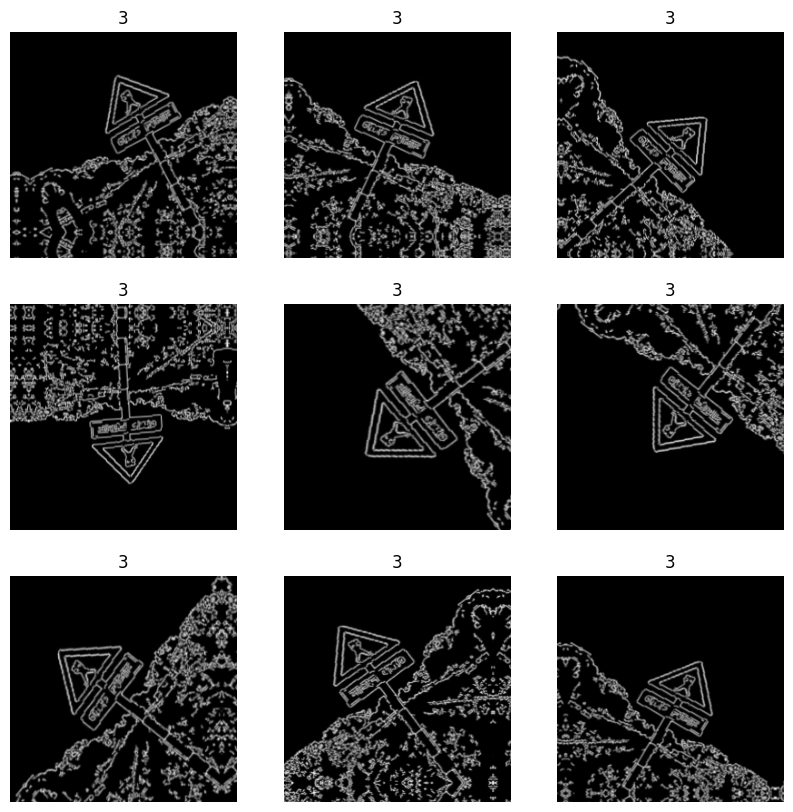

In [ ]:
import numpy as np

for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = img_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

In [ ]:
base_model = keras.applications.Xception(
    weights="imagenet",  
    input_shape=(250, 250, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.


83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 124, 124, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 124, 124, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
nb_classes = 13
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D

x = base_model.layers[-2].output
x = img_augmentation(x)
x = Flatten()(x)

x = Dropout(0.5)(x)
x = keras.layers.Dense(512, activation="relu")(x)

output = Dense(nb_classes, activation="softmax")(x)
model_final = Model(inputs=base_model.input, outputs=output)

model_final.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics =['accuracy']) 

In [ ]:
model_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 124, 124, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 124, 124, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
history = model_final.fit(train_dataset,
                          epochs = 30,
                          validation_data = validation_dataset,
                          batch_size= 32)


Epoch 1/30
203/203 [==============================] - 195s 689ms/step - loss: 21.8756 - accuracy: 0.2987 - val_loss: 1.7600 - val_accuracy: 0.3815
Epoch 2/30
203/203 [==============================] - 126s 622ms/step - loss: 0.9682 - accuracy: 0.7166 - val_loss: 0.4652 - val_accuracy: 0.8958
Epoch 3/30
203/203 [==============================] - 127s 623ms/step - loss: 0.2225 - accuracy: 0.9331 - val_loss: 0.1641 - val_accuracy: 0.9576
Epoch 4/30
203/203 [==============================] - 126s 620ms/step - loss: 0.1827 - accuracy: 0.9541 - val_loss: 0.1572 - val_accuracy: 0.9498
Epoch 5/30
203/203 [==============================] - 126s 621ms/step - loss: 0.3607 - accuracy: 0.9167 - val_loss: 0.2669 - val_accuracy: 0.9344
Epoch 6/30
203/203 [==============================] - 126s 621ms/step - loss: 0.1213 - accuracy: 0.9705 - val_loss: 0.1327 - val_accuracy: 0.9724
Epoch 7/30
203/203 [==============================] - 127s 622ms/step - loss: 0.0637 - accuracy: 0.9865 - val_loss: 1.6305 

In [ ]:
scores = model_final.evaluate(test_dataset)

30/30 [==============================] - 5s 162ms/step - loss: 0.0479 - accuracy: 0.9903


In [ ]:
class_names = test_dataset.class_names
class_names

['College in front',
 'Crossdroad',
 'Left turn',
 'Market in front',
 'Mosque in front',
 'Pedestrian crossing',
 'Rail crossing',
 'Right turn',
 'School in front',
 'Side road lef',
 'Side road right',
 'Speed breaker',
 'Speed limit']

first image to predict
actual label: Right turn
1/1 [==============================] - 1s 748ms/step
predicted label: Right turn


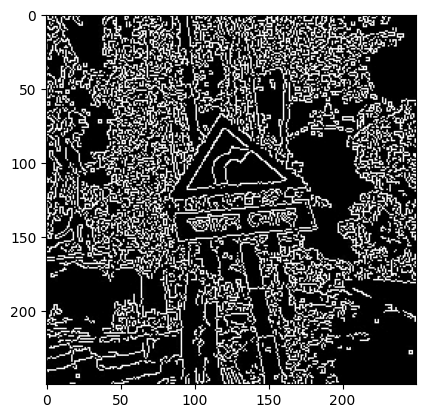

In [ ]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model_final.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


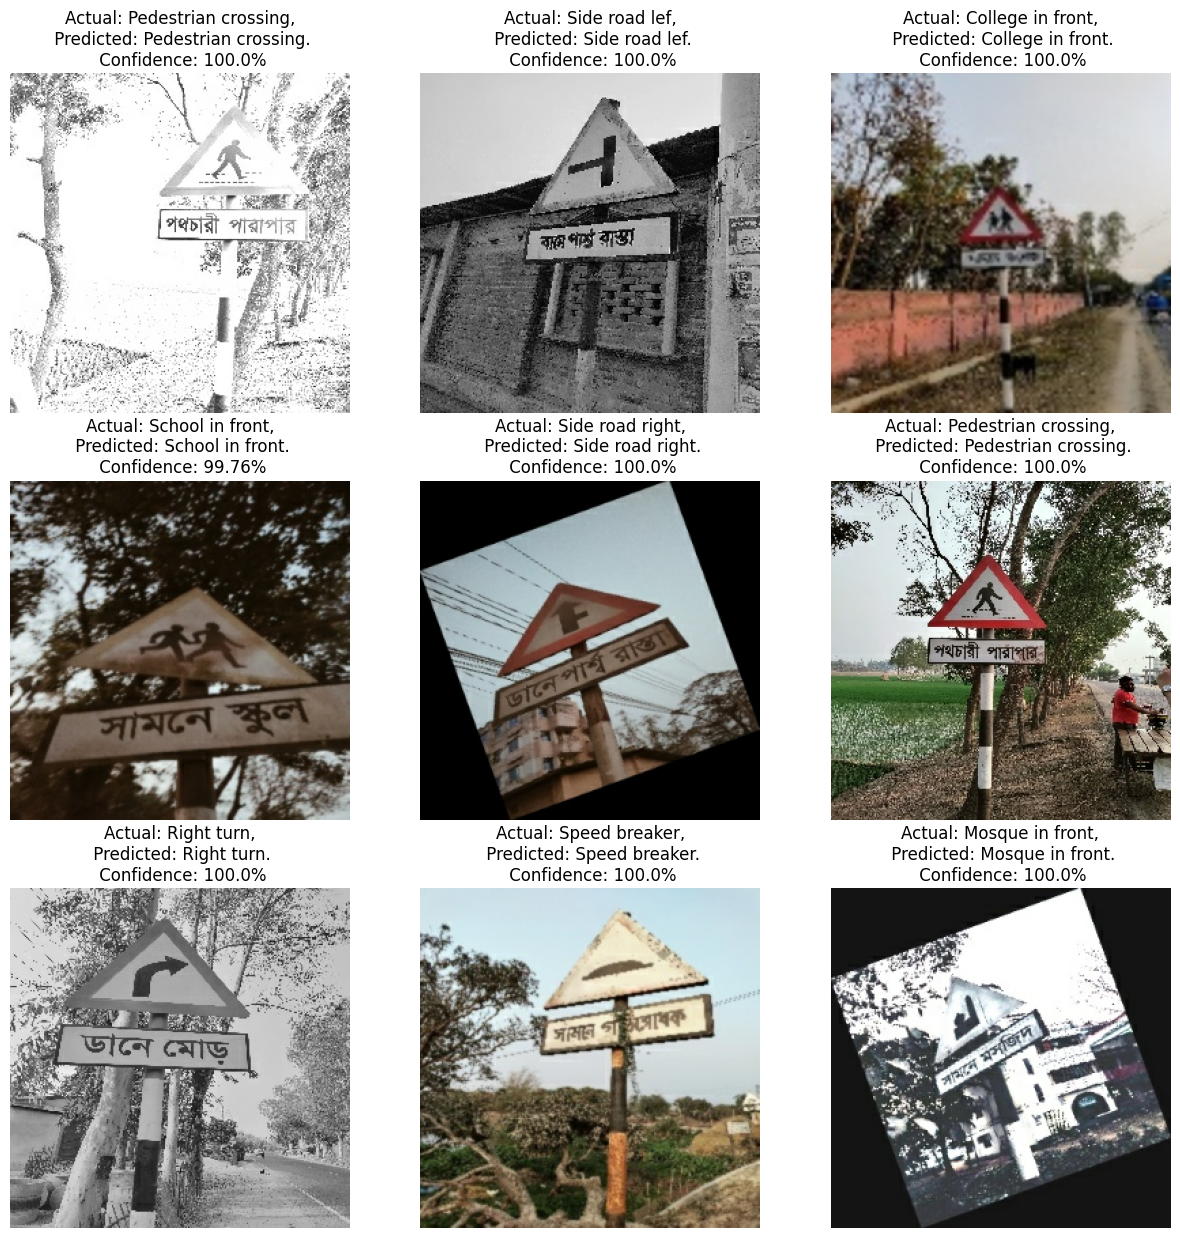

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model_final, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='test.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('test.zip')
f.keys()
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/IMG20230228181526.jpg  
  inflating: test/IMG20230228181936.jpg  
  inflating: test/IMG20230228181937.jpg  
  inflating: test/IMG_20230228_153940.jpg  
  inflating: test/IMG_20230228_154105 (2).jpg  
  inflating: test/IMG_20230228_154121 (2).jpg  
  inflating: test/IMG_20230228_154132.jpg  
  inflating: test/IMG_20230228_154413.jpg  
  inflating: test/IMG_20230228_154501.jpg  
  inflating: test/IMG_20230228_154502.jpg  
  inflating: test/IMG_20230228_155100.jpg  
  inflating: test/IMG_20230228_155102.jpg  
  inflating: test/IMG_20230228_155113.jpg  
  inflating: test/IMG_20230228_155545.jpg  
  inflating: test/IMG_20230228_155547.jpg  
  inflating: test/IMG_20230228_155640.jpg  
  inflating: test/IMG_20230228_155710.jpg  
  inflating: test/IMG_20230228_155716.jpg  
  inflating: test/IMG_20230228_160628.jpg  
  inflating: test/IMG_20230228_161901.jpg  
  inflating: test/IMG_20230228_162133.jpg  
  inflating: test/IMG_20230228_16221

In [ ]:
image_to_predict = [
    "/content/test/IMG20230228181526.jpg", 
    "/content/test/IMG20230228181936.jpg",
    "/content/test/IMG20230228181937.jpg",
    "/content/test/IMG_20230228_153940.jpg",
   "/content/test/IMG_20230228_154105 (2).jpg",
    "/content/test/IMG_20230228_154121 (2).jpg",
    "/content/test/IMG_20230228_154132.jpg",
    "/content/test/IMG_20230228_154413.jpg",
    "/content/test/IMG_20230228_154501.jpg",
    "/content/test/IMG_20230228_154502.jpg",
    "/content/test/IMG_20230228_155113.jpg",
    "/content/test/IMG_20230228_155545.jpg",
    "/content/test/IMG_20230228_155547.jpg",
    "/content/test/IMG_20230228_155640.jpg",
    "/content/test/IMG_20230228_155710.jpg",
    "/content/test/IMG_20230228_155716.jpg",
    "/content/test/IMG_20230228_160628.jpg",
    "/content/test/IMG_20230228_161901.jpg",
    "/content/test/IMG_20230228_162133.jpg",
    "/content/test/IMG_20230228_162218.jpg",
    "/content/test/IMG_20230228_162229 (2).jpg",
    "/content/test/IMG_20230228_162333.jpg",
    "/content/test/IMG_20230228_163326.jpg",
    "/content/test/IMG_20230228_163406.jpg",
    "/content/test/IMG_20230228_163739.jpg",
    "/content/test/IMG_20230228_163741.jpg",
    "/content/test/IMG_20230228_163827 (2).jpg",
    "/content/test/IMG_20230228_175945.jpg",
    "/content/test/IMG_20230228_180036.jpg",
    "/content/test/IMG_20230228_180050 (2).jpg",
    "/content/test/IMG_20230228_181559.jpg",
    "/content/test/IMG_20230228_181807.jpg",
    "/content/test/IMG_20230228_182024.jpg",
    "/content/test/IMG_20230228_182147.jpg",
    "/content/test/IMG_20230228_182211.jpg",
    "/content/test/IMG_20230228_182239.jpg",
    "/content/test/IMG_20230228_182339.jpg",
    "/content/test/IMG_20230228_182340.jpg",
    "/content/test/IMG_20230228_155100.jpg",
    "/content/test/IMG_20230228_155102.jpg"

  

    ]
for imgi in image_to_predict:
  img = keras.utils.load_img(imgi, target_size=(250,250))
  ix = keras.utils.img_to_array(img)
  ix = np.expand_dims(ix, axis=0)
  prediction = model_final.predict(ix)
  cls = tf.argmax(prediction[0], axis=-1)
  print(prediction, cls)
  print(f'{class_names[cls]} --> {imgi}')

1/1 [==============================] - 0s 22ms/step
[[0.0000000e+00 8.3878503e-17 1.1012991e-27 3.8843752e-34 1.0000000e+00
  0.0000000e+00 3.3353204e-19 4.6030656e-29 0.0000000e+00 1.1229194e-16
  1.5050470e-24 0.0000000e+00 0.0000000e+00]] tf.Tensor(4, shape=(), dtype=int64)
Mosque in front --> /content/test/IMG20230228181526.jpg
1/1 [==============================] - 0s 22ms/step
[[4.4118027e-05 4.2030091e-10 5.4096278e-19 1.8497073e-16 2.1451056e-06
  2.7887781e-08 4.2554835e-13 2.9413843e-14 7.5331047e-27 1.1415427e-12
  9.9995375e-01 9.4005004e-10 1.4006465e-20]] tf.Tensor(10, shape=(), dtype=int64)
Side road right --> /content/test/IMG20230228181936.jpg
1/1 [==============================] - 0s 23ms/step
[[5.0667769e-08 3.0270786e-13 8.3135629e-24 1.3786326e-19 2.5567400e-07
  1.0441541e-11 2.3840513e-14 3.6706606e-17 8.8023344e-32 2.3931357e-14
  9.9999964e-01 9.7559760e-10 6.2141133e-24]] tf.Tensor(10, shape=(), dtype=int64)
Side road right --> /content/test/IMG20230228181937.

In [ ]:
'''
IMG_20230228_153940 = crossroad (+1)
IMG_20230228_154501 = crossroad (+1)
IMG_20230228_154502 = crossroad (+1)

IMG_20230228_154105 (2) = market in front (+1)
IMG_20230228_154121 (2)= market in front (+1)
IMG_20230228_154132 = market in front (+1)

IMG_20230228_154413 = Left turn (+1)
IMG_20230228_155545 = Left turn (+1)
IMG_20230228_155547 = Left turn (+1)
IMG_20230228_160628 = Left turn (+1)

IMG_20230228_155100 = Right turn (+1)
IMG_20230228_155102 = Right turn (+1)
IMG_20230228_155113  = Right turn (+1)

IMG_20230228_155640 = Pedestrian crossing (+1)
IMG_20230228_155710 = Pedestrian crossing (+1)
IMG_20230228_155716 = Pedestrian crossing (+1)

IMG_20230228_161901 = Speed breaker (+1)
IMG_20230228_162218 =  Speed breaker (+1)
IMG_20230228_162229 (2) =  Speed breaker (+1)

IMG_20230228_163326  = Rail crossing (+1)
IMG_20230228_163406 = Rail crossing (+1)
IMG_20230228_162133 = Rail crossing (+1)

IMG_20230228_163739 = college in front (+1)
IMG_20230228_163741 = college in front (+1)
IMG_20230228_163827 (2) = college in front (+1)

IMG_20230228_175945 = speed limit (+1)
IMG_20230228_180036 = speed limit (+1)
IMG_20230228_180050 (2) = speed limit (+1)

IMG_20230228_181559 = Mosque in front (+1)
IMG_20230228_181807 = Mosque in front (+1)
IMG20230228181526 = Mosque in front (+1)

IMG_20230228_182147 = school in front (+1)
IMG_20230228_182211 = school in front (+1)
IMG_20230228_182239 = school in front (+1)

IMG_20230228_182339 = Side road leftt (+1)
IMG_20230228_182340 = = Side road leftt (+1)
IMG_20230228_162333 = Side road left (+1)

IMG_20230228_182024 = Side road right (+1)
IMG20230228181936 = Side road right (+1)
IMG20230228181937 = Side road right (+1)

hit = ? miss = ?
acc = ?
'''

'\nIMG_20230228_153940 = crossroad (+1)\nIMG_20230228_154501 = crossroad (+1)\nIMG_20230228_154502 = crossroad (+1)\n\nIMG_20230228_154105 (2) = market in front (+1)\nIMG_20230228_154121 (2)= market in front (+1)\nIMG_20230228_154132 = market in front (+1)\n\nIMG_20230228_154413 = Left turn (+1)\nIMG_20230228_155545 = Left turn (+1)\nIMG_20230228_155547 = Left turn (+1)\nIMG_20230228_160628 = Left turn (+1)\n\nIMG_20230228_155100 = Right turn (+1)\nIMG_20230228_155102 = Right turn (+1)\nIMG_20230228_155113  = Right turn (+1)\n\nIMG_20230228_155640 = Pedestrian crossing (+1)\nIMG_20230228_155710 = Pedestrian crossing (+1)\nIMG_20230228_155716 = Pedestrian crossing (+1)\n\nIMG_20230228_161901 = Speed breaker (+1)\nIMG_20230228_162218 =  Speed breaker (+1)\nIMG_20230228_162229 (2) =  Speed breaker (+1)\n\nIMG_20230228_163326  = Rail crossing (+1)\nIMG_20230228_163406 = Rail crossing (+1)\nIMG_20230228_162133 = Rail crossing (+1)\n\nIMG_20230228_163739 = college in front (+1)\nIMG_20230228